In [194]:
import sys
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [195]:
np.set_printoptions(threshold=sys.maxsize)
dataset = pd.read_csv("heart.csv")

# drop non-numeric values
X = dataset.drop(['HeartDisease', 'Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis = 1)
y = dataset['HeartDisease']

In [196]:
set_of_classes = y.value_counts().index.tolist()
set_of_classes= pd.DataFrame({'Class': set_of_classes})
y_dum = pd.get_dummies(y,dtype=int)

# normalization
oec = OneHotEncoder()
y_onehot = oec.fit(np.asarray(y).reshape(-1, 1))
y_onehot = oec.transform(np.asarray(y).reshape(-1, 1)).toarray()

print("Pre-processed class :")
print(y)
print(y_onehot)

Pre-processed class :
0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64
[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 

In [197]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(X)
X_rescaled = pd.DataFrame(data = X_rescaled, columns = X.columns)
print(X_rescaled)

          Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak
0    0.244898       0.70     0.479270        0.0  0.788732  0.295455
1    0.428571       0.80     0.298507        0.0  0.676056  0.409091
2    0.183673       0.65     0.469320        0.0  0.267606  0.295455
3    0.408163       0.69     0.354892        0.0  0.338028  0.465909
4    0.530612       0.75     0.323383        0.0  0.436620  0.295455
..        ...        ...          ...        ...       ...       ...
913  0.346939       0.55     0.437811        0.0  0.507042  0.431818
914  0.816327       0.72     0.320066        1.0  0.570423  0.681818
915  0.591837       0.65     0.217247        0.0  0.387324  0.431818
916  0.591837       0.65     0.391376        0.0  0.802817  0.295455
917  0.204082       0.69     0.290216        0.0  0.795775  0.295455

[918 rows x 6 columns]


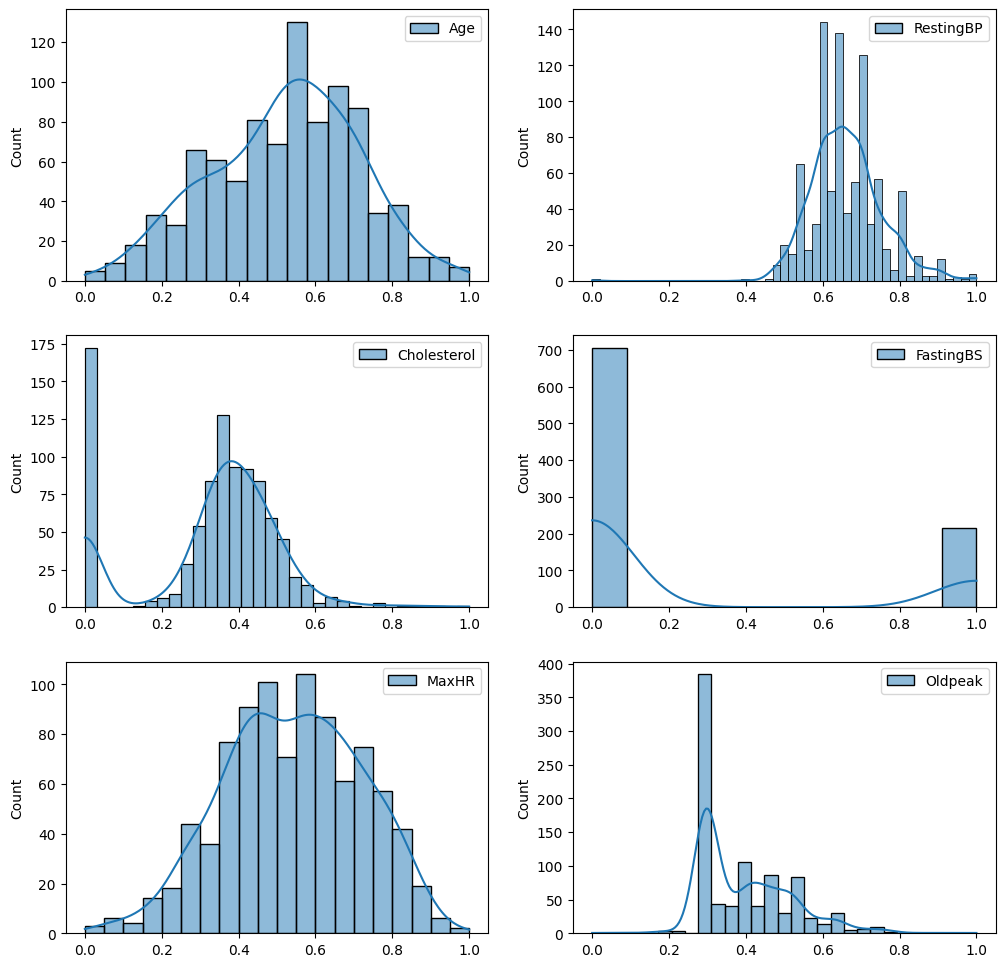

In [198]:
# data visualization
fig, axes = plt.subplots(3,2, figsize=(12,12))
axes = axes.flatten()

# Loop to create subplots
i = 0
for item in X_rescaled.items():
    sns.histplot(item, kde=True, ax=axes[i])
    i+=1

plt.show()

In [199]:
train, test = train_test_split(dataset, test_size=0.2, random_state=21)
# The remaining
X_train, y_train = train.drop(columns=['HeartDisease', 'Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']), train['HeartDisease']
X_test, y_test = test.drop(columns=['HeartDisease', 'Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']), test['HeartDisease']

In [200]:
cls = LogisticRegression()
cls.fit(X_train, y_train)
print(classification_report(y_test, cls.predict(X_test)))

# y_train needs reshaping from [734,] to [734,1]
y_train = y_train.values.reshape(734,1)

              precision    recall  f1-score   support

           0       0.73      0.74      0.73        76
           1       0.81      0.81      0.81       108

    accuracy                           0.78       184
   macro avg       0.77      0.77      0.77       184
weighted avg       0.78      0.78      0.78       184



In [201]:
print(X_train)
print(y_train)
print(len(np.asarray(y_train)))
print(len(X_train), len(y_train))

     Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak
4     54        150          195          0    122      0.0
234   54        140          309          0    140      0.0
872   55        132          353          0    132      1.2
61    43        150          254          0    175      0.0
166   50        140          231          0    140      5.0
..   ...        ...          ...        ...    ...      ...
368   57        140            0          0    120      2.0
48    36        112          340          0    184      1.0
772   45        128          308          0    170      0.0
824   37        130          250          0    187      3.5
207   35        110          257          0    140      0.0

[734 rows x 6 columns]
[[0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 

In [202]:
# polynominal regression
def poly_reg(deg):
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    X_poly = poly.fit_transform(np.asarray(X_train))
    plr = LinearRegression()

    plr.fit(X_poly, np.asarray(y_train).reshape(-1, 1))
        
    predicted = plr.predict(poly.transform(np.asarray(X_test)))

    mse = mean_squared_error(y_test,predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test,predicted)
    print('RMSE: %8.15f' % rmse)
    print('R2: %8.15f' % r2)

In [205]:
poly_reg(1)
poly_reg(2)
poly_reg(3)
poly_reg(4)
poly_reg(5)

RMSE: 0.411715083342631
R2: 0.300815400299276
RMSE: 0.406620328283052
R2: 0.318012410632937
RMSE: 0.413394222124778
R2: 0.295100661623600
RMSE: 0.627915788178042
R2: -0.626301656108229
RMSE: 2.202152097240094
R2: -19.002898024260904
